In [1]:
import mlflow
import os
import cv2
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [2]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("temp experiemnts")

<Experiment: artifact_location='/home/fatcat/Project/Experiments/mlruns/3', creation_time=1717504383188, experiment_id='3', last_update_time=1717504383188, lifecycle_stage='active', name='temp experiemnts', tags={}>

In [3]:
TEST_DATA_DIR = "data/test_data/"
TEST_GT_DIR = TEST_DATA_DIR + "test_gt"
TEST_IMG_DIR = TEST_DATA_DIR + "Images"
NUM_FILES = 2

In [4]:
def get_file_names_from_folder(folder_path, num_files):
    files = os.listdir(folder_path)
    files = [f for f in files if os.path.isfile(os.path.join(folder_path, f))]
    files = sorted(files)
    return files[:num_files]


def get_ground_truths(dir, file_names):
    columns = ['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'script', 'text']
    GTs = []
    for file_name in file_names:
        print(f"extracting {dir}/{file_name}")
        # get round truth as dataframe
        df = pd.read_csv(dir+'/'+file_name, delimiter=',', names=columns)
        
        # get df in format for evaluation
        gt = []
        for _, item in df.iterrows():
            gt.append(([[item.x1, item.y1], [item.x2, item.y2], [item.x3, item.y3], [item.x4, item.y4]], item.text))
            
        GTs.append(gt)
    return GTs


def get_images(dir, file_names):
    images = []
    print()
    for file_name in file_names:
        print(f"extracting {dir}/{file_name}")
        image = np.asarray(Image.open(dir+'/'+ file_name).convert('RGB')) # Inference is not supported for images with alpha channel
        images.append(image)
    return images

def get_image(path):
    image = np.asarray(Image.open(path).convert('RGB')) # Inference is not supported for images with alpha channel
    return image


In [37]:
image_path = 'data/test_data/Images/tr_img_01006.jpg'
image = get_image(image_path)

In [6]:
import mlflow
mlflow.set_tracking_uri("sqlite:///mlflow.db")

In [19]:

logged_model = 'runs:/d81619378c7b4ee9af3813688bab0737/glassrunner'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

preds = loaded_model.predict(image)

[2024/06/05 17:00:17] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/fatcat/Project/Experiments/mlruns/3/1e9bc129ab874f56a540571ea56acdc5/artifacts/paddleocr/artifacts/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/fatcat/Project/Experiments/mlruns/3/1e9bc129ab874f56a540571ea56acdc5/artifacts/p

In [20]:
preds

[([[74.0, 95.0], [170.0, 90.0], [171.0, 115.0], [75.0, 119.0]], 'SHTON'),
 ([[88.0, 86.0], [106.0, 86.0], [106.0, 94.0], [88.0, 94.0]], 'THE'),
 ([[94.0, 115.0], [169.0, 115.0], [169.0, 125.0], [94.0, 125.0]],
  'APARTMENT HOMES')]

In [9]:
glass_model = loaded_model.unwrap_python_model()

In [11]:
glass_model.visualize(_, image)

In [15]:
glass_model._config_path, glass_model._model_path

('/home/fatcat/Project/Experiments/mlruns/3/d81619378c7b4ee9af3813688bab0737/artifacts/glassrunner/artifacts/glass_finetune_textocr.yaml',
 '/home/fatcat/Project/Experiments/mlruns/3/d81619378c7b4ee9af3813688bab0737/artifacts/glassrunner/artifacts/glass_textocr.pth')

## Another model

In [25]:
logged_paddleocr = 'runs:/20d5ed144e2046eb9e11ab77f368431c/paddleocr'

# Load model as a PyFuncModel.
loaded_paddleocr = mlflow.pyfunc.load_model(logged_paddleocr)

preds = loaded_paddleocr.predict(image)

[2024/06/05 17:06:24] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/fatcat/Project/Experiments/mlruns/3/20d5ed144e2046eb9e11ab77f368431c/artifacts/paddleocr/artifacts/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/fatcat/Project/Experiments/mlruns/3/20d5ed144e2046eb9e11ab77f368431c/artifacts/p

In [26]:
preds

[([[74.0, 95.0], [170.0, 90.0], [171.0, 115.0], [75.0, 119.0]], 'SHTON'),
 ([[88.0, 86.0], [106.0, 86.0], [106.0, 94.0], [88.0, 94.0]], 'THE'),
 ([[94.0, 115.0], [169.0, 115.0], [169.0, 125.0], [94.0, 125.0]],
  'APARTMENT HOMES')]

In [27]:
paddle_v4 = loaded_paddleocr.unwrap_python_model()

[[[[74.0, 95.0], [170.0, 90.0], [171.0, 115.0], [75.0, 119.0]], ('SHTON', 0.995952308177948)], [[[88.0, 86.0], [106.0, 86.0], [106.0, 94.0], [88.0, 94.0]], ('THE', 0.8988298773765564)], [[[94.0, 115.0], [169.0, 115.0], [169.0, 125.0], [94.0, 125.0]], ('APARTMENT HOMES', 0.9099520444869995)]]


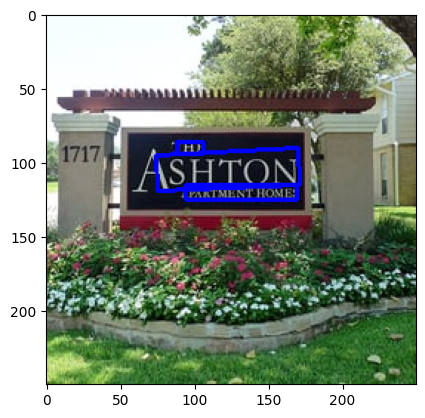

In [28]:
paddle_v4.visualize()

[2024/06/05 17:58:02] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/fatcat/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/fatcat/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_ch

[2024/06/05 17:58:05] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.25022339820861816
[2024/06/05 17:58:05] ppocr DEBUG: cls num  : 3, elapsed : 0.09976649284362793
[2024/06/05 17:58:06] ppocr DEBUG: rec_res num  : 3, elapsed : 0.8793132305145264


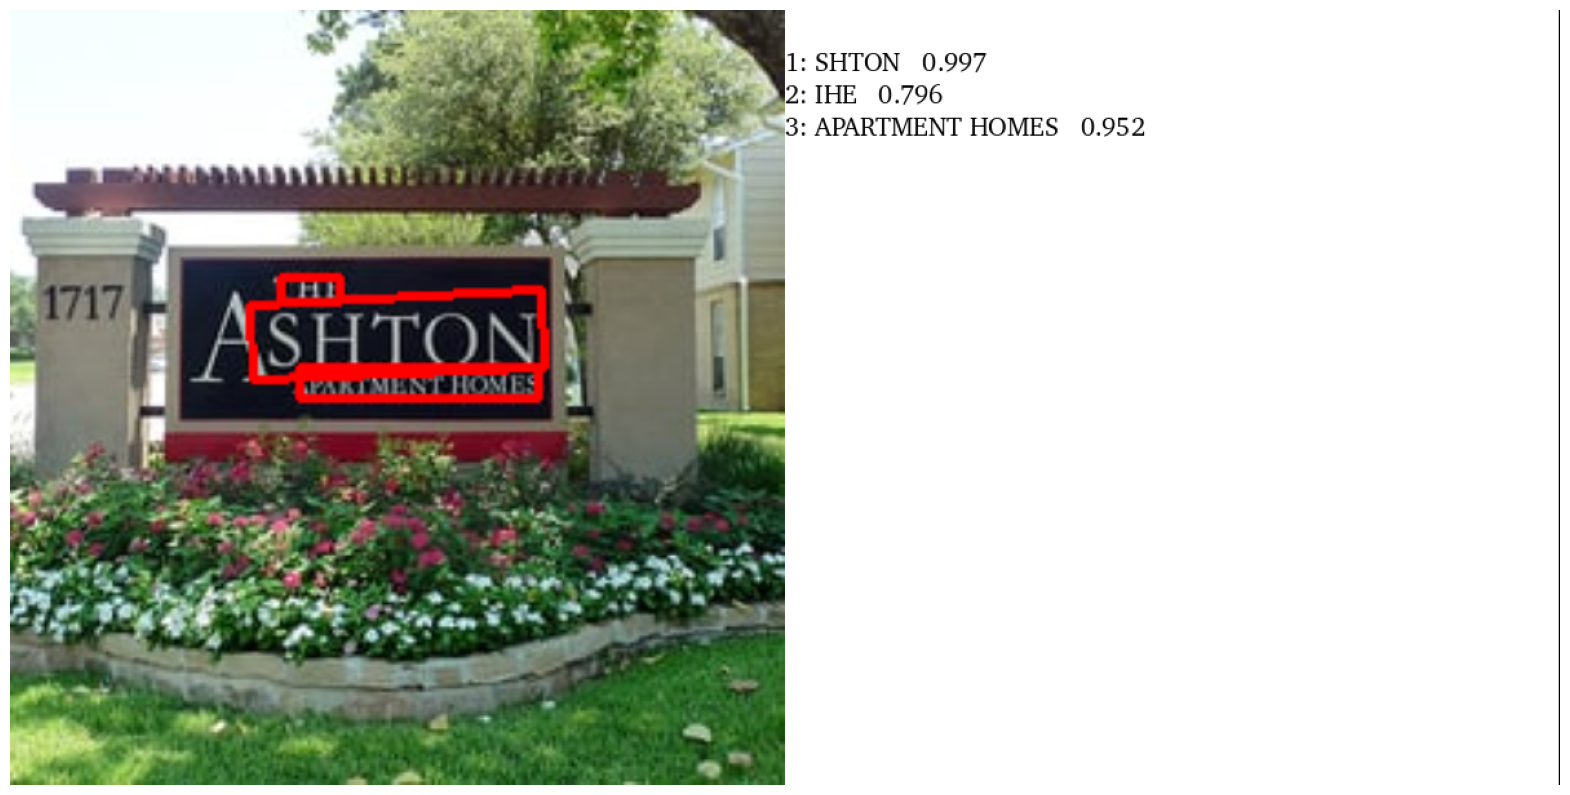

In [38]:
from paddleocr import PaddleOCR
from paddleocr.tools.infer.utility import draw_ocr
import matplotlib.pyplot as plt
from PIL import Image

# Khởi tạo mô hình OCR
ocr = PaddleOCR(use_angle_cls=True, lang='en')


# Nhận diện văn bản
result = ocr.ocr(image_path, cls=True)

# Đọc ảnh
image = Image.open(image_path).convert('RGB')

# Tách kết quả dự đoán
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

# Vẽ kết quả lên ảnh
im_show = draw_ocr(image, boxes, txts, scores, font_path="fonts/latin.ttf")
im_show = Image.fromarray(im_show)

# Tăng kích thước hiển thị ảnh
plt.figure(figsize=(20, 15))  # Adjust the size as needed
plt.imshow(im_show)
plt.axis('off')
plt.show()
